# MINE 4101 Ciencia de datos aplicados - Taller 1
Elaborado por:
- Juan Manuel Rivera  - 201534131
- Johana Alejandra Rativa - 

En este taller se analizarán los datos de dos hoteles con el objetivo de optimizar sus estrategias de ocupación, buscando insights enfocados a disminuir las cancelaciones y aumentar la ocupación.

Se analizarán aspectos asociados a la duración de la estadía, la probabilidad de cancelación y la influencia de características como el tipo de
hotel, la composición del grupo de huéspedes o el canal de reservación es vital para el éxito del negocio.


# 0. Importación de librerías

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 33)

# 1. Entendimiento de los datos

## 1.1 Carga y validación inicial de los datos

In [67]:
# Primero se importarán los datos de los hoteles
df = pd.read_csv('./hotel_bookings_modified.csv')

C:\Users\jmriv\AppData\Local\Temp\ipykernel_2216\176352992.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./hotel_bookings_modified.csv')


In [68]:
# Validaremos cuántos datos vienen en la base de datos
print(f'La base de datos tiene {df.shape[1]} columnas y {df.shape[0]} filas.')

La base de datos tiene 33 columnas y 58895 filas.


In [69]:
# Se mirarán 5 filas del conjunto de datos
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
29081,Resort Hotel,0,9,NaN,October,43,16,2,2,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,2.0,NaN,0.0,Transient,96.00,0.0,0.0,Check-Out,2016-10-20,NaN
31620,Resort Hotel,0,110,2016.0,December,53,28,1,4,2,0.0,0,HB,PRT,Direct,Direct,0,0,0,E,E,1,No Deposit,NaN,NaN,0.0,Transient,148.00,1.0,1.0,Check-Out,2017-01-02,NaN
36060,Resort Hotel,0,0,2017.0,May,19,7,1,0,2,0.0,0,BB,BRA,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0.0,Transient,60.00,1.0,2.0,Check-Out,2017-05-08,NaN
34979,Resort Hotel,0,125,2017.0,April,14,3,2,5,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,40.0,NaN,0.0,Contract,42.95,0.0,1.0,Check-Out,2017-04-10,NaN
20411,Resort Hotel,0,1,2016.0,January,5,24,2,2,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,E,2,No Deposit,240.0,NaN,0.0,Transient,40.00,0.0,0.0,Check-Out,2016-01-28,NaN


In [72]:
# Se confirma el tipo de dato que se tiene en cada columna
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [73]:
# Se listarán los valores únicos de cada columna para identificar posibles valores atípicos

for col in df.columns:
    print(col)
    print(df[col].unique())
    print('--'*10)

hotel
['Resort Hotel' 'City Hotel']
--------------------
is_canceled
[0 1]
--------------------
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 1

## 1.2 Limpieza de los datos

### 1.2.1 Datos no válidos y nulos en variables contínuas
Se identificarán datos no válidos y nulos, con el objetivo de decidir si se deben omitir del análisis 

In [65]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                   588
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             478
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              9132
company                           55416


Previendo que en el análisis posterior se usará las columna _adr_ se eliminará el registro nulo, al ser solo 1.

Adicionalmente, las columnas asociadas a qué agente o qué compañía realizaron la reserva se omitirá del análisis, por lo que se eliminarán. La columna _kids_ también se considera de baja calidad y redundante, pues se tienen las columnas _babies_ y _children_, y será eliminada.

In [77]:
print(f'La base de datos tiene {df.shape[1]} columnas y {df.shape[0]} filas antes de eliminar el registro.')
df.dropna(subset=['adr'],inplace=True)
df.drop(['agent', 'company', 'kids'], axis=1, inplace=True)
print(f'La base de datos tiene {df.shape[1]} columnas y {df.shape[0]} filas luego de eliminar el registro.')

La base de datos tiene 33 columnas y 58894 filas antes de eliminar el registro.
La base de datos tiene 30 columnas y 58894 filas luego de eliminar el registro.


In [86]:
# Veremos el número de datos fuera del rango esperado para las siguientes variables
columns_to_check = [
    'adults',
    'children',
    'babies',
    'adr'
]
for column in columns_to_check:
    if column == 'adults':
        # Se presume que debería haber al menos un adulto en cada reserva
        below_zero = (df[column] <= 0).sum()
    else:
        below_zero = (df[column] < 0).sum()
    print(f'Para la columna {column} {"hay "+str(below_zero)+" valores por debajo de 0" if below_zero else "no hay valores bajo 0"}')

Para la columna adults hay 203 valores por debajo de 0
Para la columna children no hay valores bajo 0
Para la columna babies hay 90 valores por debajo de 0
Para la columna adr hay 1 valores por debajo de 0


In [99]:
df[(df['adr'] < 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017.0,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0.0,Transient-Party,-6.38,0.0,0.0,Check-Out,2017-03-15


In [97]:
(df['adr'] == 0).sum()

np.int64(954)

En la columna _adr_ no tiene sentido valores negativos, pues hace referencia al precio promedio por noche. Como solo se tiene 1 valor, se le cambiará el signo a este valor.

Por otro lado, se tienen 954 reservas con valor promedio de 0. Más adelante se analizará la distribución de esta variable

In [100]:
# Se remplazará el valor de -1 por un 0
df['adr'] = df['adr'].replace({-6.38: 6.38})

### 1.2.2 Estandarización de datos

In [106]:
# Se modificaran los datos de algunas columnas para que conincidan con los valores del diccionario de datos

# Se convertirá la columna de cancelación a valores booleanos
df['is_canceled'] = df['is_canceled'].replace({0: False, 1: True})

# Se corrigen valores atípicos en la fecha de llegada
df['arrival_date_year'] = df['arrival_date_year'].replace({20016.: 2016.})

# Se convertirá la columna si el husped ya se había alojado previamente
df['is_repeated_guest'] = df['is_repeated_guest'].replace({0: False, 1: True})

# Se unifican los valores en el tipo del depósito
df['deposit_type'] = df['deposit_type'].replace({'No Refund': 'Non Refund'})

# Se unifican los valores del tipo de comidas incluídas
df['meal'] = df['meal'].replace({'Undefined': 'SC'})

C:\Users\jmriv\AppData\Local\Temp\ipykernel_2216\596597187.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_canceled'] = df['is_canceled'].replace({0: False, 1: True})
C:\Users\jmriv\AppData\Local\Temp\ipykernel_2216\596597187.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_repeated_guest'] = df['is_repeated_guest'].replace({0: False, 1: True})


In [8]:
df.dtypes

hotel                              object
is_canceled                          bool
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                    bool
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## 1.3 Atributos más importantes
Se realizará un análisis univariado de cada una de las siguientes variables:
- **hotel**: indica si el hotel es rural o urbano
- **is_canceled**: indica si la reserva fue cancelada
- **lead_time**: cuántos días han pasado entre que se crea la reserva y la fecha de llegada
- **adr**: tarifa promedio por día
- **arrival_date_month**: mes de llegada

### 1.3.1 Tipo de hotel

In [10]:
df['hotel'].value_counts()

hotel
Resort Hotel    40063
City Hotel      18832
Name: count, dtype: int64

In [17]:
df['hotel'].value_counts(normalize=True)

hotel
Resort Hotel    0.680245
City Hotel      0.319755
Name: proportion, dtype: float64

Podemos ver que la mayoría de las reservas son del hotel rural (68,03%) que del hotel de la ciudad (31,97%). Esto se debe tener en cuenta al momento de comparar los datos entre los hoteles.

### 1.3.2 Cancelación de las reservas

In [18]:
df['is_canceled'].value_counts()

is_canceled
False    34666
True     24229
Name: count, dtype: int64

In [19]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
False    0.588607
True     0.411393
Name: proportion, dtype: float64

Respecto al número de cancelaciones vemos que más de la mitad de las reservas (58,86%) que se hacen son canceladas.

### 1.3.3 Días entre la reserva y la fecha de llegada

In [20]:
df['lead_time'].describe()

count    58895.000000
mean       100.050904
std        101.162420
min          0.000000
25%         17.000000
50%         69.000000
75%        157.000000
max        737.000000
Name: lead_time, dtype: float64

<Axes: >

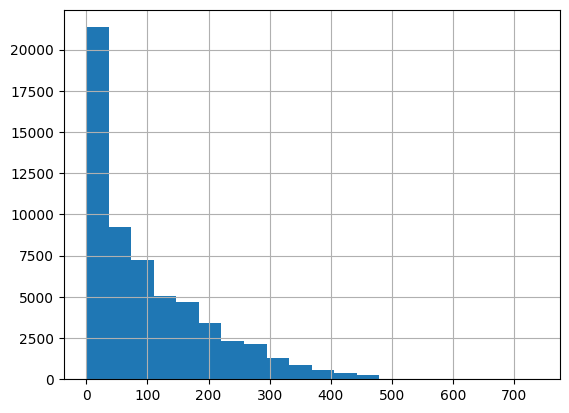

In [23]:
df['lead_time'].hist(bins=20)

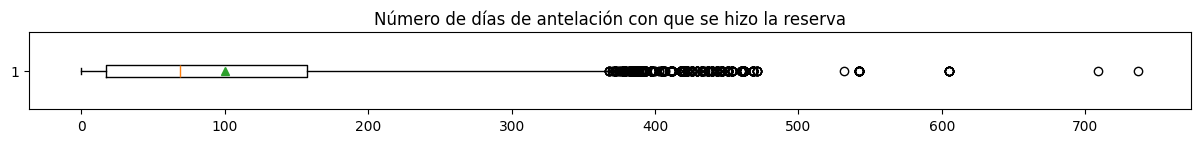

In [33]:
# Plotting distribution but using a boxplot
plt.figure(figsize=(15, 1))
plt.boxplot(df['lead_time'], showmeans=True, vert=False)
plt.title('Número de días de antelación con que se hizo la reserva')
plt.show()

Podemos ver que en promedio una reserva se realiza 100 días antes la fecha de llegada (100,05 ± 101,16 (DE) ), . Sin embargo, también vemos que la distribución está corrida hacia la izquierda, ya que Q1 y Q2 son inferiores al promedio.

Cuando se vayan a realizar cálculos usando esta variable se deberían tener en cuenta los valores mayores que si bien son atípicos pueden ser válidos

### 1.3.4 Tarifa promedio por día

In [101]:
df['adr'].describe()

count    58894.000000
mean        96.250643
std         58.555243
min          0.000000
25%         60.000000
50%         84.000000
75%        120.000000
max       5400.000000
Name: adr, dtype: float64

<Axes: >

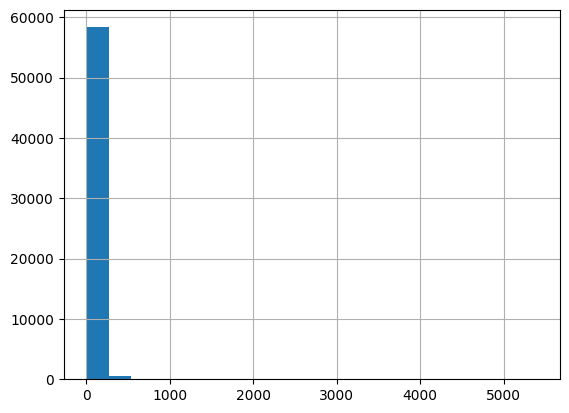

In [102]:
df['adr'].hist(bins=20)

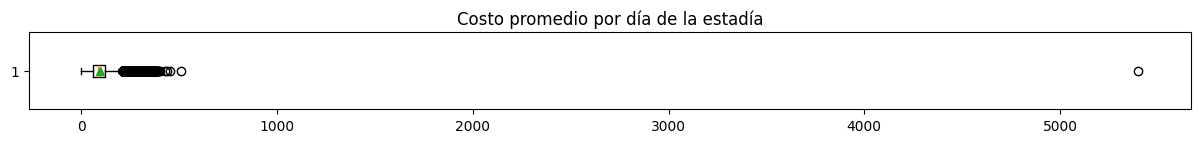

In [104]:
# Plotting distribution but using a boxplot
plt.figure(figsize=(15, 1))
plt.boxplot(df['adr'], showmeans=True, vert=False)
plt.title('Costo promedio por día de la estadía')
plt.show()

In [108]:
df[(df['adr'] > 5000)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,True,35,2016.0,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,1,Non Refund,0.0,Transient,5400.0,0.0,0.0,Canceled,2016-02-19


Podemos ver que en promedio una reserva cuesta 96.25 por día (96.25 ± 58.55 (DE) ), . Sin embargo, también vemos que hay una reserva con un valor mucho más alto al rango de valores que se manejan. Se validarán los estadísticos sin este dato

In [110]:
values_without_outlier = df[(df['adr'] < 5000)]['adr']

In [112]:
values_without_outlier.describe()

count    58893.000000
mean        96.160586
std         54.324181
min          0.000000
25%         60.000000
50%         84.000000
75%        120.000000
max        508.000000
Name: adr, dtype: float64

<Axes: >

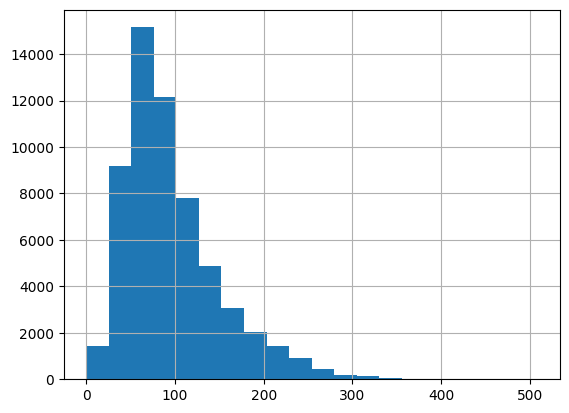

In [113]:
values_without_outlier.hist(bins=20)

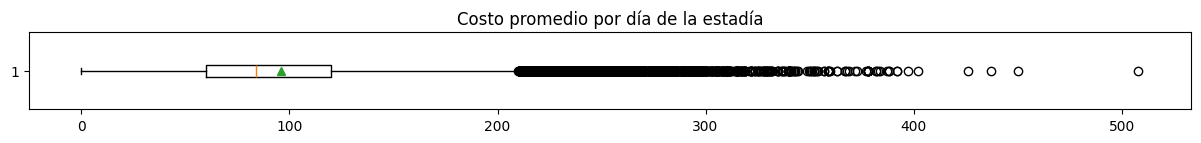

In [114]:
# Plotting distribution but using a boxplot
plt.figure(figsize=(15, 1))
plt.boxplot(values_without_outlier, showmeans=True, vert=False)
plt.title('Costo promedio por día de la estadía')
plt.show()

Quitando el dato atípico podemos ver que el valor promedio de la reserva por día es similar (96.16 ± 54.324 (DE) ). Adicionalmente, la distribución parece estar corrida hacia la izquierda.

## 1.3.5 

# 2. 

Posibles análisis
- ¿Cómo influye el tiempo de antelación a la cancelación de la reserva? -> t test, regresión log
- Influye el costo en las cancelaciones? -> t test, regresión log
- Hay más cancelaciones en la ciudad o en el campo -> chi
- incluye el tipo de depósito en la reserva
- En que meses hay mayor ocupación/reservas?
- Las cancelaciones previas están correlacionadas con que se cancele la reserva (previous cancelations and previous not canceled)
- El tipo de reserva está relacionado con si se cancela o no la reserva
